## Introduction

#### Dataquest Guided Project 1:The goal of this project is to assess offensive line performance in pass protection. In an ideal situation a quarterback will have a clean pocket with room to throw. To this end the center becomes critical in preventing defenders from pushing forward. A clean pocket is considered to be a semi-circle with the center being the apex of the arc. If the apex collapses backward, it becomes increasingly difficult for the quarterback to successfully complete a pass. For this reason, the distance a defender penetrates the arc, measured using the x column of the tracking data, will be used to assess performance of the center.

## Methodology
    
#### The key task in measuring defender penetration is determining who the center is blocking. This was achieved by finding the Euclidean distance between the center and selected defenders using “x” & “y” values from tracking data. The defender with the shortest Euclidean distance to the center was identified as the defender being blocked by the center. Euclidean distance was calculated 0.3 seconds after ball snap to allow time for the center to engage in a block (i.e., a rushing linebacker may not initially be lined up on the line of scrimmage). 

#### For this project, defensive backs were excluded as potential defenders since the center generally does not block these defenders. Future iterations of this project may include defensive backs for greater accuracy.  

#### After the defender being blocked by the center was identified, penetration was calculated by subtracting the starting “x” value (0.3 seconds after ball snap) from the ending “x” value when a pass is thrown (“event” = pass_forward). The higher the penetration, the farther up field a defender was able to get and collapse the pocket. Visiting team penetration was multiplied by -1 to account for the different direction of play (x = 0 for the home team endzone versus x = 100 for the visiting team end zone).

#### It is important to note that lateral movement (“y” value on the tracking data) was not considered because changes in lateral movement would not impact the quarterback nearly as much as changes in vertical (“x” value) movement. A defender getting past the center or pushing the center back into the quarterback is much more impactful than a defender moving left or right to the sidelines. 

#### Finally, penetration was averaged for each center and sorted from lowest to highest. This provided a list of centers ranked best to worst based on the amount of penetration they allowed. The number of plays for each center was included since a center with 250 snaps is much more accurately measured versus a center with 10 snaps. Not all defenders are included as some plays had two centers listed, likely due to a back-up center playing guard, or some similar issue. These plays with multiple centers were removed from the dataset. Future iterations of this project may involve identification of the true center when multiple centers are listed. 

## Data Preparation

#### A brief overview of data preparation will be included here. In depth review of data preparation can be achieved by viewing code with notes in the Appendix (below).

#### Data preparation included extensive identification of records by combining ID such as “gameId”,” playId”, “frameId”, “nflId” and more. It was necessary to identify data at the game level, play level, and frame level for each player and position to appropriately merge datasets and compare Euclidean distance between the center and each different defender. This was achieved by splitting out the tracking data by position, renaming columns as needed (i.e. “x” becomes “DE_x” for defensive ends) then merging the position data sets back into each other. Once this was completed, each center was listed with each defender on the same row. Euclidean distance could then be calculated for each center and defender on a row wise basis.

#### Once the Euclidean distance was calculated and the engaged defender was identified, a list of defenders was created. This list of defenders was then merged with a list of centers and penetration calculated as discussed above. Each play included frames that was limited to 0.3 after the snap to the moment a pass was attempted. This penetration value was then averaged for each center.

## Results

#### The above process resulted in a list of 46 centers by name, team, number of snaps included in the average, and average penetration. Penetration ranged from -6.22 to 5.68. A negative value indicates the defender was pushed backward. Note, an average penetration of -6.22 was achieved by a center with a single snap. This would not be representative of ongoing performance. 


| Rank | displayName       | penetration | Play Count | possessionTeam |
|------|-------------------|-------------|------------|----------------|
| 1    | Jake Brendel      | -6.22       | 1          | SF             |
| 2    | Will Clapp        | -3.26       | 12         | NO             |
| 3    | Ryan Bates        | -1.75       | 3          | BUF            |
| 4    | Lloyd Cushenberry | -1.22       | 281        | DEN            |
| 5    | Chase Roullier    | -1.11       | 253        | WAS            |
| 6    | Tyler Biadasz     | -0.88       | 235        | DAL            |
| 7    | Austin Reiter     | -0.73       | 71         | MIA            |
| 8    | Ryan Kelly        | -0.58       | 235        | IND            |
| 9    | Trey Hopkins      | -0.56       | 222        | CIN            |
| 10   | Bradley Bozeman   | -0.51       | 233        | BAL            |
| 11   | Kendrick Green    | -0.47       | 201        | PIT            |
| 12   | Erik McCoy        | -0.39       | 75         | NO             |
| 13   | Matt Paradis      | -0.36       | 240        | CAR            |
| 14   | Corey Linsley     | -0.32       | 255        | LAC            |
| 15   | Brian Allen       | -0.31       | 239        | LA             |
| 16   | Michael Deiter    | -0.28       | 107        | MIA            |
| 17   | Sam Mustipher     | -0.18       | 236        | CHI            |
| 18   | Creed Humphrey    | -0.17       | 312        | KC             |
| 19   | Greg Mancz        | -0.04       | 110        | MIA            |
| 20   | Billy Price       | -0.02       | 104        | NYG            |
| 21   | Ryan Jensen       | -0.02       | 298        | TB             |
| 22   | J.C. Tretter      | 0.13        | 237        | CLE            |
| 23   | Mitch Morse       | 0.16        | 234        | BUF            |
| 24   | David Andrews     | 0.19        | 134        | NE             |
| 25   | Andre James       | 0.22        | 250        | LV             |
| 26   | Connor McGovern   | 0.27        | 251        | NYJ            |
| 27   | Max Garcia        | 0.36        | 57         | ARI            |
| 28   | Ben Jones         | 0.36        | 210        | TEN            |
| 29   | Jason Kelce       | 0.38        | 237        | PHI            |
| 30   | Justin Britt      | 0.43        | 136        | HOU            |
| 31   | Matt Hennessy     | 0.46        | 267        | ATL            |
| 32   | Josh Myers        | 0.52        | 106        | GB             |
| 33   | Garrett Bradbury  | 0.75        | 236        | MIN            |
| 34   | Justin McCray     | 0.78        | 74         | HOU            |
| 35   | Alex Mack         | 0.78        | 203        | SF             |
| 36   | Tyler Larsen      | 0.85        | 22         | WAS            |
| 37   | Nick Gates        | 1.01        | 38         | NYG            |
| 38   | Frank Ragnow      | 1.12        | 126        | DET            |
| 39   | Evan Brown        | 1.18        | 174        | DET            |
| 40   | Ethan Pocic       | 1.29        | 33         | SEA            |
| 41   | Rodney Hudson     | 1.71        | 86         | ARI            |
| 42   | Trystan Colon     | 2.25        | 18         | BAL            |
| 43   | Ryan McCollum     | 4.03        | 2          | DET            |
| 44   | J.C. Hassenauer   | 4.93        | 10         | PIT            |
| 45   | Trey Hill         | 5.44        | 1          | CIN            |
| 46   | Aaron Brewer      | 5.68        | 5          | TEN            |

#### The histograph below shows the number of centers in the given range of penetration value. The majority of centers had an average penetration of -2 and 2 yards, with 20/46 centers averaging just over 0 yards. The mean was 0.35 yards, and the median was 0.17 yards. 

<img src="histo_avg_pen.png" width="800" height="400">

####  A coach or general manager could use this data to compare centers across the league. A coach would be able to identify, to a high degree of precision, centers with comparable penetration scores. The average penetration could also be used determine if a center is performing above or below the league average. Further, a coach could compare a center’s penetration score on a week to week basis against the center’s historical average to determine performance for a particular week. Further, weekly scores could be graphed to identify trends throughout the season. Penetration could also be broken down by the type of play, offensive formation, defensive formation, and more. 

#### Lastly, while not initially intended as part of this project, datasets were created that enable visual tracking of a center and the defender on a play-by-play basis. This makes it possible to evaluate a center’s movement against a defender on each play. A coach could visually see how the center moved and potentially correct poor play. 

<img src="scatter1.png" width="800" height="400">

<img src="scatter2.png" width="800" height="400">

## Analysis

#### The accuracy of result bears discussion. Direct evaluation of results was not possible due to a lack of comparable metrics found during a Google search. Additionally, only 8 games of 2021 was used versus a full season. A review centers listed on pff.com’s 2022 NFL Center Ranking and Tiers did not seem to reflect the average penetration score. This is not entirely unexpected as average penetration is an extremely specific measurement and would not be used to assess overall center performance.

#### In consideration of accuracy of scoring a couple issues stand out. First, this model does not take into consideration double teams. This model was also based on the assumption that whoever is closest to the center 0.3 seconds after the snap was who the center is blocking. This time period after the snap may need to be adjusted up to increase the chance of who the center is blocking. However, increasing the measurement period (i.e., 0.5 seconds after the snap) could decrease the true measurement of how far a defender is able to penetrate the pocket. Additionally, while reviewing individual plays on scatterplots (above), it is clear that the wrong defender was occasionally identified as the pattern of movement for the center did not match the blocker.

#### There is also the issue of multiple centers being present in the data on a particular play. Removal of these “duplicate” center lowers the average and possibly even removes centers from the calculations. Lastly, as noted previously, defensive backs were not included.

#### Due to these considerations, this penetration metric should be viewed as a “rough” measurement of performance. However, there is significant potential with adjustments to the model.

## Conclusion

#### The goal of this project was to identify a novel metric that measures performance of the offensive line on pass plays. Measuring the amount of penetration a defender achieves against a center was selected due to the potential impact on quarterback play. This penetration metric can be used by coaches or staff to compare one center against every other center in the league, or the center’s own play over the course of the season, or even performance over the course of a single game. This has implications for free agency, coaching technique, and even strength and conditioning training. 


# Appendix (code)

In [1]:
import numpy as np
import pandas as pd
import dtale as dt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

### Load Data sets from Kaggle

In [2]:
games = pd.read_csv("games.csv")
scout = pd.read_csv("pffScoutingData.csv")
players = pd.read_csv("players.csv")
plays = pd.read_csv("plays.csv")
week1 = pd.read_csv("week1.csv")
week2 = pd.read_csv("week2.csv")
week3 = pd.read_csv("week3.csv")
week4 = pd.read_csv("week4.csv")
week5 = pd.read_csv("week5.csv")
week6 = pd.read_csv("week6.csv")
week7 = pd.read_csv("week7.csv")
week8 = pd.read_csv("week8.csv")

# Hypothesis: A high-performing offensive lineman will engage a defensive lineman in a block for a longer period of time than average.

## Initial Task: combine data frames so that each game, play, player, and timeframe can be identified on a single row.

1. Concat weeks 1-8
2. convert game & week ID to string
3. convert id to string for later concatenation
4. create unique ID for game & play ID combined on weeks dataframe

In [3]:
frames = [week1, week2, week3, week4, week5, week6, week7, week8]

week = pd.concat(frames)

#convert id to string for later concatenation
players[['officialPosition']] = players[['officialPosition']].astype(str)

week[['gameId', 'playId','frameId']] = week[['gameId', 'playId', 'frameId']].astype(str)

#create unique ID for game& play ID combined
week['game_play_id'] = week['gameId']+week['playId']
week['game_play_id'].head(5)

0    202109090097
1    202109090097
2    202109090097
3    202109090097
4    202109090097
Name: game_play_id, dtype: object

In [4]:
week = week.drop(['jerseyNumber','team', 's', 'a', 'dis', 'o', 'dir'], axis=1)
week.shape

(8314178, 10)

## Create game and play ID on plays dataframe

In [5]:
plays[['gameId', 'playId']] = plays[['gameId', 'playId']].astype(str)

plays['game_play_id'] = plays['gameId']+plays['playId']
plays.head(5)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,game_play_id
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,202109090097
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone,2021090900137
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone,2021090900187
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,...,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone,2021090900282
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,...,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone,2021090900349


In [6]:
plays.shape

(8557, 33)

### Create function to view data in dtale quickly 

In [7]:
import dtale as dt

def dtale(data):
    d = dt.show(data)
    d.open_browser()
    
#dtale(week)

In [8]:
week.shape

(8314178, 10)

### Merge player df with weeks df using column player ID and add player position

In [9]:
player_position = players[['nflId','officialPosition']]

weeks2 = pd.merge(week, player_position, 
                      on ='nflId', 
                      how ='inner')

weeks2A = weeks2 # save copy for later use 
weeks2.head()

,gameId,playId,nflId,frameId,time,playDirection,x,y,event,game_play_id,officialPosition
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,right,37.77,24.22,None,202109090097,QB
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,right,37.78,24.22,None,202109090097,QB
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,right,37.78,24.24,None,202109090097,QB
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,right,37.73,24.25,None,202109090097,QB
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,right,37.69,24.26,None,202109090097,QB


### Convert play data to float for math

In [10]:
weeks2[["x", "y"]] = weeks2[["x", "y"]].astype('float16')
weeks2['x'].dtype

dtype('float16')

### Add play data

## Merge play df with weeks df

In [11]:
#merge plays with weeks
pass_plays = plays[['game_play_id','offenseFormation', 'pff_playAction', 'defendersInBox','passResult','prePenaltyPlayResult', 'personnelO','personnelD','dropBackType',
                    'pff_passCoverage','pff_passCoverageType']]


weeks3 = pd.merge(weeks2, pass_plays, 
                      on ='game_play_id', 
                      how ='inner')

weeks3[['nflId', 'frameId']] = weeks3[['nflId', 'frameId']].astype(str)
weeks3['game_play_frame_id'] = weeks3['gameId']+weeks3['playId']+weeks3['frameId']



weeks3.shape

(7952692, 22)

## Filter to frameId 9, which is .3 seconds after a snap

In [12]:
weeks3 = weeks3.loc[weeks3['frameId'] == '9']

In [13]:
weeks3['passResult'].value_counts()

C     101640
I      60610
S      11946
R       9878
IN      4180
Name: passResult, dtype: int64

### Drop a couple columns 

### create position + NFLId to ID player by position and UID

In [14]:
weeks3['position+NFL_ID'] = weeks3['officialPosition'] + weeks3['nflId']

### Split out O-line players and D-line players into separate dataframes so they can be recombined on the same row
### Goal: To find the euclidean distance between the center and each defensive player. The player with the shortest distance will be the player the center actually bloacked. 

In [15]:
player_position['officialPosition'].value_counts()

WR     210
CB     192
DE     142
OLB    136
RB     126
T      122
TE     121
DT     114
G       99
ILB     81
FS      72
SS      69
QB      60
C       55
NT      34
MLB     27
FB      15
DB       2
LB       2
Name: officialPosition, dtype: int64

In [16]:
C_df = weeks3.loc[(weeks3['officialPosition'] == 'C')] 


NT_df = weeks3.loc[(weeks3['officialPosition'] == 'NT')] 
DT_df = weeks3.loc[(weeks3['officialPosition'] == 'DT')] 
DE_df = weeks3.loc[(weeks3['officialPosition'] == 'DE')]
OLB_df = weeks3.loc[(weeks3['officialPosition'] == 'OLB')]
MLB_df = weeks3.loc[(weeks3['officialPosition'] == 'MLB')]
LB_df = weeks3.loc[(weeks3['officialPosition'] == 'LB')]
ILB_df = weeks3.loc[(weeks3['officialPosition'] == 'ILB')]         

In [17]:
positions = [C_df, NT_df, DT_df, DE_df, OLB_df, MLB_df, LB_df, ILB_df]

### Add position prefix to each (x, y) coordinate to identify player/position coordinates

### Note: At this point each position has its own dataframe 

In [18]:
pos_col_name = ['C_', 'NT_', 'DT_', "DE_", 'OLB_', 'MLB_', 'LB_', 'ILB_']#prefix


[_df.rename(columns={'x': prefix+'x'}, inplace=True)
 for prefix, _df in zip(pos_col_name, positions)]

[_df.rename(columns={'y': prefix+'y'}, inplace=True)
 for prefix, _df in zip(pos_col_name, positions)]



[None, None, None, None, None, None, None, None]

### Drop a couple unnecessary columns

In [19]:
drop_col = ['gameId','playId', 'frameId', 'time']

for p in positions:
    for c in drop_col:
        p.drop(columns=[c], inplace=True)


In [20]:
#positions = [OL_df, DT_df, DE_df, OLB_df, MLB_df, LB_df, IB_df]
for p in positions:
    print(p.shape)

(8414, 19)
(2952, 19)
(9828, 19)
(13646, 19)
(12972, 19)
(2895, 19)
(5, 19)
(8516, 19)


## Add nfl ID to each defensive dataframe to use group by later

In [21]:
defenders = [ NT_df, DT_df, DE_df, OLB_df, MLB_df, LB_df, ILB_df]
pos_nfl_col= ['NT_nfl_ID', 'DT_nfl_ID', 'DE_nfl_ID', 'OLB_nfl_ID', 'MLB_nfl_ID', 'LB_nfl_ID', 'ILB_nfl_ID']

def defense_NFL_ID(df, col_name):
    df[col_name] = df['position+NFL_ID']
    
for d, c in zip(defenders, pos_nfl_col):
    defense_NFL_ID(d, c)

### Combine all dataframes in weeks to single row based on master ID. Drop duplicate columns.

In [22]:
drop_cols2 = ['defendersInBox', 'dropBackType', 'event', 'offenseFormation', 'officialPosition', 'passResult', 
              'personnelD', 'personnelO', 'pff_passCoverageType', 'pff_passCoverage', 
              'pff_playAction', 'playDirection', 'prePenaltyPlayResult','position+NFL_ID', 'nflId','game_play_id']



for d in defenders:
    for c in drop_cols2:
        d.drop(columns=[c], inplace=True)

## Merge each defender onto center, creating 7 dataframes with center and a defender position

In [23]:
C_eb_DT = C_df.merge(DT_df,on='game_play_frame_id', how='left')


In [24]:
C_eb_DE = C_df.merge(DE_df,on='game_play_frame_id', how='left')

In [25]:
C_eb_OLB = C_df.merge(OLB_df,on='game_play_frame_id', how='left')

In [26]:
C_eb_MLB = C_df.merge(MLB_df,on='game_play_frame_id', how='left')

In [27]:
C_eb_LB = C_df.merge(LB_df,on='game_play_frame_id', how='left')

In [28]:
C_eb_ILB = C_df.merge(ILB_df,on='game_play_frame_id', how='left')


In [29]:
C_eb_NT = C_df.merge(NT_df,on='game_play_frame_id', how='left')

In [30]:
eb = [C_eb_DT, C_eb_DE, C_eb_OLB, C_eb_MLB, C_eb_LB, C_eb_ILB, C_eb_NT]

## Merging causes numerous duplicate columns that need to be dropped

In [31]:
#drop duplicate columns except for 1 dataframe
drop_eb = [C_eb_DE, C_eb_OLB, C_eb_MLB, C_eb_LB, C_eb_ILB, C_eb_NT]

drop_cols4 = ['playDirection', 'C_x', 'C_y', 'event', 'officialPosition',
       'offenseFormation', 'pff_playAction', 'defendersInBox', 'passResult',
       'prePenaltyPlayResult', 'personnelO', 'personnelD', 'dropBackType',
       'pff_passCoverage', 'pff_passCoverageType','game_play_id', 'position+NFL_ID','nflId']

for d in drop_eb:
    for c in drop_cols4:
        d.drop(columns=[c], inplace=True)

## Merge all 7 center and defender columns onto 1 dataframe

In [32]:
C_eb = C_eb_DT.merge(C_eb_DE,on='game_play_frame_id', how='left')

In [33]:
C_eb = C_eb.merge(C_eb_OLB,on='game_play_frame_id', how='left')

In [34]:
C_eb = C_eb.merge(C_eb_MLB,on='game_play_frame_id', how='left')

In [35]:
C_eb = C_eb.merge(C_eb_LB,on='game_play_frame_id', how='left')                

In [36]:
C_eb = C_eb.merge(C_eb_ILB,on='game_play_frame_id', how='left')              

In [37]:
C_eb = C_eb.merge(C_eb_NT,on='game_play_frame_id', how='left')

In [38]:
def rename_col(df, x, y):
    df.rename(columns={x:'O_x', y:'O_y'}, inplace=True)
    
rename_col(C_eb, "C_x", 'C_y')

In [39]:
frames = [C_eb,]
eb = pd.concat(frames)

## Find distance between each o-lineman and each defensive player .3 seconds after snap (frameId == '9')

In [40]:
def euclidean_dist(col_name, def_x, def_y):
    eb[col_name] = np.sqrt( (eb['O_x']-eb[def_x])**2 + (eb['O_y']-eb[def_y])**2)

In [41]:
euclidean_dist('DT_dist','DT_x','DT_y')

In [42]:
euclidean_dist('DE_dist','DE_x','DE_y')

In [43]:
euclidean_dist('OLB_dist','OLB_x','OLB_y')

In [44]:
euclidean_dist('MLB_dist','MLB_x','MLB_y')

In [45]:
euclidean_dist('LB_dist','LB_x','LB_y')

In [46]:
euclidean_dist('ILB_dist','ILB_x','ILB_y')

In [47]:
euclidean_dist('NT_dist','NT_x','NT_y')

### Combine game_play_ID & position+NFL_ID to group by each center and average the distance. 

In [48]:
eb['game_play_offPosition_nfl_ID'] = eb['game_play_id']+eb['position+NFL_ID']
eb['game_play_frame_offPosition_nfl_ID'] = eb['game_play_frame_id']+eb['position+NFL_ID']

In [49]:
eb['game_play_offPosition_nfl_ID_DT_nfl_ID'] = eb['game_play_offPosition_nfl_ID'] + eb['DT_nfl_ID']

DT_eb_dist2 = eb.groupby(['game_play_offPosition_nfl_ID','game_play_offPosition_nfl_ID_DT_nfl_ID','playDirection', 'event', 'officialPosition','offenseFormation', 'pff_playAction', 
            'defendersInBox', 'passResult', 'prePenaltyPlayResult', 'personnelO', 'personnelD', 
            'dropBackType', 'pff_passCoverage', 'pff_passCoverageType', 'DT_nfl_ID'],
           as_index=False).agg({'DT_dist':'mean', 'DE_dist':'mean','OLB_dist':'mean','MLB_dist':'mean',
                               'LB_dist':'mean','ILB_dist':'mean', 'NT_dist':'mean'})

In [50]:
eb['game_play_offPosition_nfl_ID_DE_nfl_ID'] = eb['game_play_offPosition_nfl_ID'] + eb['DE_nfl_ID']

In [51]:
DE_eb_dist2 = eb.groupby(['game_play_offPosition_nfl_ID','game_play_offPosition_nfl_ID_DE_nfl_ID','playDirection', 'event', 'officialPosition','offenseFormation', 'pff_playAction', 
            'defendersInBox', 'passResult', 'prePenaltyPlayResult', 'personnelO', 'personnelD', 
            'dropBackType', 'pff_passCoverage', 'pff_passCoverageType','DE_nfl_ID'],
           as_index=False).agg({'DT_dist':'mean', 'DE_dist':'mean','OLB_dist':'mean','MLB_dist':'mean',
                               'LB_dist':'mean','ILB_dist':'mean', 'NT_dist':'mean'})

In [52]:
eb['game_play_offPosition_nfl_ID_OLB_nfl_ID'] = eb['game_play_offPosition_nfl_ID'] + eb['OLB_nfl_ID']

In [53]:
OLB_eb_dist2 = eb.groupby(['game_play_offPosition_nfl_ID','game_play_offPosition_nfl_ID_OLB_nfl_ID','playDirection', 'event', 'officialPosition','offenseFormation', 'pff_playAction', 
            'defendersInBox', 'passResult', 'prePenaltyPlayResult', 'personnelO', 'personnelD', 
            'dropBackType', 'pff_passCoverage', 'pff_passCoverageType', 'OLB_nfl_ID'],
           as_index=False).agg({'DT_dist':'mean', 'DE_dist':'mean','OLB_dist':'mean','MLB_dist':'mean',
                               'LB_dist':'mean','ILB_dist':'mean', 'NT_dist':'mean'})

In [54]:
eb['game_play_offPosition_nfl_ID_MLB_nfl_ID'] = eb['game_play_offPosition_nfl_ID'] + eb['MLB_nfl_ID']

In [55]:
MLB_eb_dist2 = eb.groupby(['game_play_offPosition_nfl_ID','game_play_offPosition_nfl_ID_MLB_nfl_ID','playDirection', 'event', 'officialPosition','offenseFormation', 'pff_playAction', 
            'defendersInBox', 'passResult', 'prePenaltyPlayResult', 'personnelO', 'personnelD', 
            'dropBackType', 'pff_passCoverage', 'pff_passCoverageType', 'MLB_nfl_ID'],
           as_index=False).agg({'DT_dist':'mean', 'DE_dist':'mean','OLB_dist':'mean','MLB_dist':'mean',
                               'LB_dist':'mean','ILB_dist':'mean', 'NT_dist':'mean'})

In [56]:
eb['game_play_offPosition_nfl_ID_ILB_nfl_ID'] = eb['game_play_offPosition_nfl_ID'] + eb['ILB_nfl_ID']


In [57]:
ILB_eb_dist2 = eb.groupby(['game_play_offPosition_nfl_ID','game_play_offPosition_nfl_ID_ILB_nfl_ID','playDirection', 'event', 'officialPosition','offenseFormation', 'pff_playAction', 
            'defendersInBox', 'passResult', 'prePenaltyPlayResult', 'personnelO', 'personnelD', 
            'dropBackType', 'pff_passCoverage', 'pff_passCoverageType','ILB_nfl_ID'],
           as_index=False).agg({'DT_dist':'mean', 'DE_dist':'mean','OLB_dist':'mean','MLB_dist':'mean',
                               'LB_dist':'mean','ILB_dist':'mean', 'NT_dist':'mean'})

In [58]:
eb['game_play_offPosition_nfl_ID_LB_nfl_ID'] = eb['game_play_offPosition_nfl_ID'] + eb['LB_nfl_ID']


In [59]:
LB_eb_dist2 = eb.groupby(['game_play_offPosition_nfl_ID','game_play_offPosition_nfl_ID_LB_nfl_ID','playDirection', 'event', 'officialPosition','offenseFormation', 'pff_playAction', 
            'defendersInBox', 'passResult', 'prePenaltyPlayResult', 'personnelO', 'personnelD', 
            'dropBackType', 'pff_passCoverage', 'pff_passCoverageType','LB_nfl_ID'],
           as_index=False).agg({'DT_dist':'mean', 'DE_dist':'mean','OLB_dist':'mean','MLB_dist':'mean',
                               'LB_dist':'mean','ILB_dist':'mean', 'NT_dist':'mean'})

In [60]:
eb['game_play_offPosition_nfl_ID_NT_nfl_ID'] = eb['game_play_offPosition_nfl_ID'] + eb['NT_nfl_ID']


In [61]:
NT_eb_dist2 = eb.groupby(['game_play_offPosition_nfl_ID','game_play_offPosition_nfl_ID_NT_nfl_ID','playDirection', 'event', 'officialPosition','offenseFormation', 'pff_playAction', 
            'defendersInBox', 'passResult', 'prePenaltyPlayResult', 'personnelO', 'personnelD', 
            'dropBackType', 'pff_passCoverage', 'pff_passCoverageType', 'NT_nfl_ID'],
           as_index=False).agg({'DT_dist':'mean', 'DE_dist':'mean','OLB_dist':'mean','MLB_dist':'mean',
                               'LB_dist':'mean','ILB_dist':'mean', 'NT_dist':'mean'})

## Rename columns so they all have the same name, which allows for concatenation. This is down twice because we used grooup by twice (I need to clean up the code still).

In [62]:
def rename_col(df, defender_ID):
    df.rename(columns={defender_ID:'game_play_offPosition_nfl_ID_defender_nfl_ID'}, inplace=True)
    
rename_col(DT_eb_dist2, 'game_play_offPosition_nfl_ID_DT_nfl_ID')
rename_col(DE_eb_dist2, 'game_play_offPosition_nfl_ID_DE_nfl_ID')
rename_col(OLB_eb_dist2, 'game_play_offPosition_nfl_ID_OLB_nfl_ID')
rename_col(MLB_eb_dist2, 'game_play_offPosition_nfl_ID_MLB_nfl_ID')
rename_col(ILB_eb_dist2, 'game_play_offPosition_nfl_ID_ILB_nfl_ID')
rename_col(LB_eb_dist2, 'game_play_offPosition_nfl_ID_LB_nfl_ID')
rename_col(NT_eb_dist2, 'game_play_offPosition_nfl_ID_NT_nfl_ID')

## Rename the player position and UID so the column can be concatenated.

In [63]:
def rename_def_pos_id(df, def_nfl_ID):
    df.rename(columns={def_nfl_ID:'def_pos_nfl_id'}, inplace=True)
    
rename_def_pos_id(DT_eb_dist2,'DT_nfl_ID')
rename_def_pos_id(DE_eb_dist2,'DE_nfl_ID')
rename_def_pos_id(NT_eb_dist2,'NT_nfl_ID')
rename_def_pos_id(OLB_eb_dist2,'OLB_nfl_ID')
rename_def_pos_id(MLB_eb_dist2,'MLB_nfl_ID')
rename_def_pos_id(ILB_eb_dist2,'ILB_nfl_ID')
rename_def_pos_id(LB_eb_dist2,'LB_nfl_ID')

## Concat all defender dataframes into one.

In [64]:
frames = [DT_eb_dist2,DE_eb_dist2,OLB_eb_dist2,MLB_eb_dist2,ILB_eb_dist2,LB_eb_dist2,NT_eb_dist2]

eb_dist2 = pd.concat(frames)

## Find assigned blocker by selecting row wise minim value for distance

In [65]:
eb_dist2['blocked'] = eb_dist2[['DT_dist', 'DE_dist', 'OLB_dist', 'MLB_dist',
       'LB_dist', 'ILB_dist', 'NT_dist']].min(axis=1)

eb_dist2[['DT_dist', 'DE_dist', 'OLB_dist', 'MLB_dist', 'LB_dist', 'ILB_dist', 'NT_dist', 'blocked']].head(5)

,DT_dist,DE_dist,OLB_dist,MLB_dist,LB_dist,ILB_dist,NT_dist,blocked
0,1.581055,5.378906,5.277344,NaN,NaN,7.8125,2.669922,1.581055
1,1.549805,3.478516,5.148438,4.824219,NaN,NaN,NaN,1.549805
2,1.656250,4.847656,4.394531,7.761719,NaN,NaN,NaN,1.656250
3,1.756836,3.943359,4.128906,5.460938,NaN,NaN,NaN,1.756836
4,1.499023,4.210938,3.171875,2.640625,NaN,NaN,NaN,1.499023


In [66]:
conditions = [
    (eb_dist2['blocked'] == eb_dist2['DT_dist']),
    (eb_dist2['blocked'] == eb_dist2['DE_dist']),
    (eb_dist2['blocked'] == eb_dist2['OLB_dist']),
    (eb_dist2['blocked'] == eb_dist2['MLB_dist']),
    (eb_dist2['blocked'] == eb_dist2['LB_dist']),
    (eb_dist2['blocked'] == eb_dist2['ILB_dist']),
    (eb_dist2['blocked'] == eb_dist2['NT_dist'])
]

values = ['DT', 'DE', 'OLB', 'MLB','LB', 'ILB', 'NT']

eb_dist2['blocked_position'] = np.select(conditions, values)

## Split out defender position from defender UID to compare to UID. Thgis is necessary because we need to filter down to the UID that belongs to the correct defender only.

In [67]:
eb_dist2['defPosition'] = eb_dist2['def_pos_nfl_id'].str[0:2]
eb_dist2['def_nflId'] = eb_dist2['def_pos_nfl_id'].str[2:]

## Split out the defender player from main UID.

In [68]:
eb_dist2['eb_blocked_player'] = eb_dist2['game_play_offPosition_nfl_ID_defender_nfl_ID'].str[-7:]
eb_dist2['eb_blocked_player'].head(5)

0    42560.0
1    53504.0
2    53504.0
3    53621.0
4    53621.0
Name: eb_blocked_player, dtype: object

## Groupby game_play_offPoss_nfl_ID and select minimum 'blocked' (time) to get actual blocked player

In [69]:
eb_filtered = eb_dist2.sort_values("blocked").groupby("game_play_offPosition_nfl_ID", as_index=False).first()
eb_filtered.head()

,game_play_offPosition_nfl_ID,game_play_offPosition_nfl_ID_defender_nfl_ID,playDirection,event,officialPosition,offenseFormation,pff_playAction,defendersInBox,passResult,prePenaltyPlayResult,...,OLB_dist,MLB_dist,LB_dist,ILB_dist,NT_dist,blocked,blocked_position,defPosition,def_nflId,eb_blocked_player
0,20210909001078C52554.0,20210909001078C52554.0ILB38588.0,right,None,C,SHOTGUN,0,5.0,C,5,...,5.277344,NaN,NaN,10.523438,2.669922,1.581055,DT,IL,B38588.0,38588.0
1,20210909001203C40151.0,20210909001203C40151.0DE42403.0,left,None,C,SHOTGUN,0,6.0,C,5,...,5.148438,4.824219,NaN,NaN,NaN,1.549805,DT,DE,42403.0,42403.0
2,20210909001227C40151.0,20210909001227C40151.0MLB43306.0,left,None,C,SHOTGUN,0,5.0,C,19,...,4.394531,7.761719,NaN,NaN,NaN,1.656250,DT,ML,B43306.0,43306.0
3,20210909001267C40151.0,20210909001267C40151.0MLB43306.0,left,None,C,SINGLEBACK,1,7.0,C,17,...,4.128906,5.460938,NaN,NaN,NaN,1.756836,DT,ML,B43306.0,43306.0
4,20210909001312C40151.0,20210909001312C40151.0DT53621.0,left,None,C,SINGLEBACK,1,7.0,C,2,...,3.171875,2.640625,NaN,NaN,NaN,1.499023,DT,DT,53621.0,53621.0


## We will now work towards measuring the amount of "push" (x value) a defender gets on each center by (eventually) subtracting the starting x value form the end x value of the defender. A negative number indicates the center pushed the defender backwards. A positive value indicates the defender was able to move forward. 

In [70]:
defender = eb_filtered

## Remove center from defender_list ID...use new ID to filter weeks 3 after taking out all center. then merge filtered weeks with center dataframe

In [71]:
defender['def_game_play_ID'] = defender['game_play_offPosition_nfl_ID_defender_nfl_ID'].str[:14]
defender['def_nfl_ID'] = defender['game_play_offPosition_nfl_ID_defender_nfl_ID'].str[-7:]

In [72]:
defender['def_game_play_nfl_id'] = defender['game_play_offPosition_nfl_ID_defender_nfl_ID'].str.replace(r'C\w\w\w\w\w.0', '')
defender['def_game_play_nfl_id'] = defender['def_game_play_nfl_id'].str.replace(r'ILB', '')
defender['def_game_play_nfl_id'] = defender['def_game_play_nfl_id'].str.replace(r'MLB', '')
defender['def_game_play_nfl_id'] = defender['def_game_play_nfl_id'].str.replace(r'OLB', '')
defender['def_game_play_nfl_id'] = defender['def_game_play_nfl_id'].str.replace(r'DT', '')
defender['def_game_play_nfl_id'] = defender['def_game_play_nfl_id'].str.replace(r'DE', '')
defender['def_game_play_nfl_id'] = defender['def_game_play_nfl_id'].str.replace(r'NT', '')
defender['def_game_play_nfl_id'] = defender['def_game_play_nfl_id'].str.replace(r'LB', '')

In [73]:
defender_list = defender['def_game_play_nfl_id'].tolist()

## Merge game data with play data to add home team and visiting abbreviation in order to identify direction on field team is driving (increaing or decreasing x)

In [74]:
games['gameId'] = games['gameId'].astype(str)

team_abbr = games[['gameId','homeTeamAbbr', 'visitorTeamAbbr']]
   
weeks2A = pd.merge(weeks2A, team_abbr, 
                      on ='gameId', 
                      how ='inner')

weeks2A[["x", "y"]] = weeks2A[["x", "y"]].astype('float16')
weeks2A.shape

(7952692, 13)

In [75]:
#merge plays with weeks

pass_plays = plays[['game_play_id','offenseFormation', 'quarter', 'possessionTeam','pff_playAction', 'defendersInBox','passResult','prePenaltyPlayResult', 'personnelO','personnelD','dropBackType',
                    'pff_passCoverage','pff_passCoverageType']]
   
weeks3A = pd.merge(weeks2A, pass_plays, 
                      on ='game_play_id', 
                      how ='inner')

weeks3A['frameId'] = weeks3A['frameId'].astype(int)

weeks3A = weeks3A.loc[weeks3A['frameId'] >= 9]

weeks3A.shape

(6446660, 25)

### create various IDs for player by position and UID

In [76]:
weeks3A[['nflId', 'frameId']] = weeks3A[['nflId', 'frameId']].astype(str)

weeks3A['game_play_frame_id'] = weeks3A['gameId']+weeks3A['playId']+weeks3A['frameId']

weeks3A['position+NFL_ID'] = weeks3A['officialPosition'] + weeks3A['nflId']

weeks3A['game_play_nfl_id'] = weeks3A['game_play_id'] + weeks3A['nflId'] 

## Split out center from rest of df

In [77]:
C_df = weeks3A.loc[(weeks3A['officialPosition'] == 'C')] 

## Filter weeks 3 down to defender game_play_nfl_id

In [78]:
def_weeks3 = weeks3A.loc[(weeks3A['game_play_nfl_id'].isin(defender_list))]

## Label center and defender x, y

In [79]:
pos_col_name = ['C_', 'def_']#prefix

dfs = [C_df, def_weeks3]

[_df.rename(columns={'x': prefix+'x'}, inplace=True)
 for prefix, _df in zip(pos_col_name, dfs)]

[_df.rename(columns={'y': prefix+'y'}, inplace=True)
 for prefix, _df in zip(pos_col_name, dfs)]

[_df.rename(columns={'position+NFL_ID': prefix+'position+NFL_ID'}, inplace=True)
 for prefix, _df in zip(pos_col_name, dfs)]

[_df.rename(columns={'game_play_nfl_id': prefix+'game_play_nfl_id'}, inplace=True)
 for prefix, _df in zip(pos_col_name, dfs)]

[None, None]

## Drop duplicate columns from defender list

In [80]:
cols = ['gameId','playId', 'quarter', 'nflId','frameId','time','playDirection', 'event', 'game_play_id',
       'officialPosition', 'offenseFormation', 'pff_playAction', 'homeTeamAbbr', 'visitorTeamAbbr',
       'defendersInBox', 'passResult', 'prePenaltyPlayResult', 'possessionTeam',
       'personnelO', 'personnelD', 'dropBackType', 'pff_passCoverage', 'pff_passCoverageType']

for c in cols:
    def_weeks3.drop(columns=[c], inplace=True)

### Multiple centers found on play(technically not possibly...likely a center is playing another o-lilne position. Remove duplicate centers.

In [81]:
ids = C_df['game_play_frame_id']

dup = C_df[ids.isin(ids[ids.duplicated()])].sort_values('game_play_frame_id')

dup_list = dup['game_play_frame_id'].tolist()

C_df = C_df[~C_df['game_play_frame_id'].isin(dup_list)]

### Remove dupicate center values & merge C_df with def_weeks3 on game_play_frame_id

In [82]:
def_ids = def_weeks3['game_play_frame_id']
dup = def_weeks3[def_ids.isin(def_ids[def_ids.duplicated()])].sort_values('game_play_frame_id')

dup_list = dup['game_play_frame_id'].tolist()

def_weeks3 = def_weeks3[~def_weeks3['game_play_frame_id'].isin(dup_list)]# May not actually hve any..shouldn't

In [83]:
C_df = C_df.merge(def_weeks3,on='game_play_frame_id', how='left')

### Remove NaN def_x values caused by dropping duplicate centers previously in code

In [84]:
C_df = C_df[C_df['def_x'].notna()]

## Remove play_frame_ID after forward pass

In [85]:
ids = C_df["game_play_id"].unique().tolist()

frames = []
for uid in ids:
    split = C_df.loc[C_df["game_play_id"] == uid]
    idx = next((idx for idx, val in enumerate(split["event"]) if val == "pass_forward"), len(split.index))
    result = split.iloc[: idx + 1]
    frames.append(result)

final = pd.concat(frames)

## Find the difference in x to find how far the defender traveled. 

In [86]:
penetration = final.groupby(['game_play_id','C_position+NFL_ID', 'homeTeamAbbr', 'visitorTeamAbbr', 'possessionTeam' ], as_index=False).agg( lambda x: x.iloc[0] - x.iloc[-1])

### Convert visiting defense to same polarity (positive/negative) as home team since home and visiting team x move in opposite direction.

In [87]:
def change_visitor_negative(row):
    if row['homeTeamAbbr'] == row['possessionTeam']:
        val = -1
    elif row['homeTeamAbbr'] != row['possessionTeam']:
        val = 1
    return val

In [88]:
penetration['def_factor'] = penetration.apply(change_visitor_negative, axis=1)
penetration["penetration"] = penetration['def_x'] * penetration["def_factor"]
penetration = penetration.sort_values(by=['penetration'])

### Find the average penetration for each center

In [89]:
avg_penetration = penetration.groupby(['C_position+NFL_ID', 'possessionTeam' ], 
                              as_index=False).agg({'penetration':'mean', 'game_play_id' : 'count'})

In [90]:
avg_penetration = avg_penetration.sort_values(by=['penetration'])

### Merge avg_penetration with players df to get name of center

In [91]:
avg_penetration["nflId"] = avg_penetration['C_position+NFL_ID'].str[1:]
avg_penetration["nflId"] = avg_penetration['nflId'].str[:-2]

In [92]:
players[['nflId']] = players[['nflId']].astype(str)
player_names = players[['nflId', 'displayName']]

In [93]:
avg_penetration = pd.merge(avg_penetration, player_names, 
                      on ='nflId', 
                      how ='left')

In [94]:
avg_penetration['Play Count'] = avg_penetration['game_play_id']

avg_penetration = avg_penetration[['displayName', 'penetration', 'Play Count','possessionTeam']]

In [95]:
dtale(avg_penetration)

In [96]:
avg_penetration.to_excel("avg_penetration.xlsx")

### Graph the center and defensive player on a scatter plot for a specified play

In [97]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

In [162]:
def scat(game_play_id):
    Xy = C_df.loc[C_df['game_play_id'] == game_play_id, ['C_x', 'C_y']]
    Xy['Role'] = "Center"


    def_Xy = C_df.loc[C_df['game_play_id'] == game_play_id, ['def_x', 'def_y']]
    def_Xy['Role'] = "Defense"

    Xy = Xy.rename(columns={"C_x": "X"})
    Xy = Xy.rename(columns={"C_y": "y"})
    Xy = pd.concat([Xy,def_Xy.rename(columns={'def_x':'X', 'C_x': 'X', 'def_y':'y', 'C_y':'y'})], ignore_index=True)

    def categorise(row):  
        if row['Role'] == 'Center':
            return 'blue'
        elif row['Role'] == "Defense":
            return 'red'
    
    Xy['Color'] = Xy.apply(lambda row: categorise(row), axis=1)

    colors=['blue', 'red']

    # scatter plot with two features
    fig = plt.figure(figsize=(8,6))
    s = plt.scatter(Xy["X"], Xy["y"], s=150, c=Xy["Color"])
    plt.xlabel('Yardline', size=24)
    plt.ylabel('Width', size=24)
    plt.title("Center vs Defender Movement", size=18)
    fig.set_facecolor('white')
    #fig.style.use('seaborn-darkgrid')
    plt.legend(Xy['Role'])
    #plt.savefig("scatter2.png")
    plt.show()

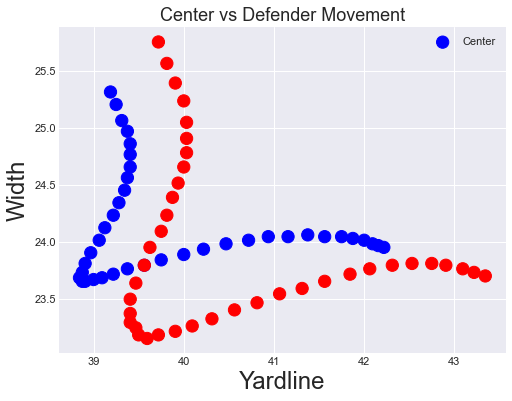

In [161]:
scat('20210913004765')

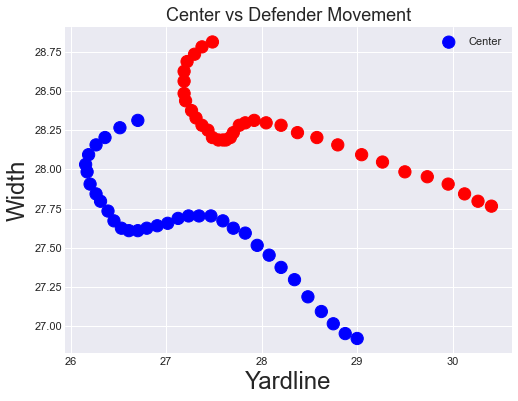

In [163]:
scat('20210913004691')

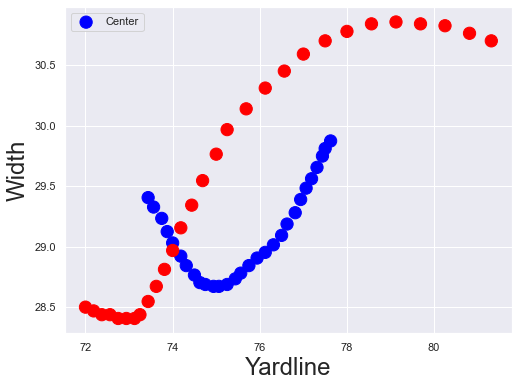

In [458]:
scat('20211010071268')

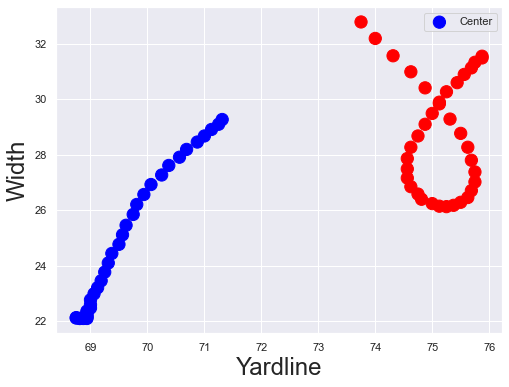

In [459]:
scat('20211024093701')

## Assess spread of average penetration for centers

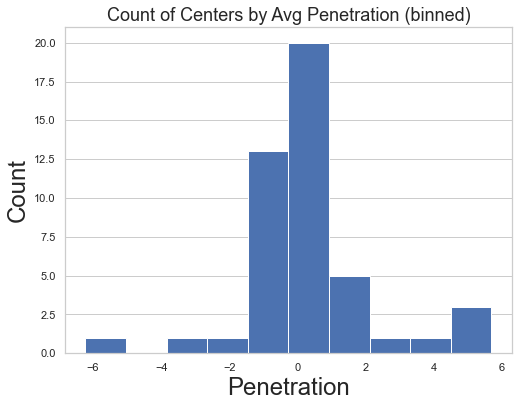

In [127]:
sns.set_style('whitegrid')

#avg_penetration['penetration'].plot(kind='hist')
plt.figure(figsize=(8,6))
avg_penetration['penetration'].hist()
plt.title("Count of Centers by Avg Penetration (binned)", size=18)
plt.xlabel("Penetration", size=24)
plt.ylabel("Count", size=24)
plt.grid(axis='x')
plt.savefig('histo_avg_pen.png')